German Traffic Sign Recognition Benchmark (GTSRB)
=================================================
---
Introduction au Deep Learning  (IDLE) - S. Aria, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020

## Episode 2 : First Convolutions

Our main steps:
 - Read dataset
 - Build a model
 - Train the model
 - Model evaluation




## 1/ Import and init

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import idle.pwk as ooo
from importlib import reload

ooo.init()

IDLE 2020 - Practical Work Module
  Version            : 0.1.1
  Run time           : Wednesday 8 January 2020, 23:42:33
  Matplotlib style   : idle/talk.mplstyle
  TensorFlow version : 2.0.0
  Keras version      : 2.2.4-tf


## 2/ Reload dataset
Dataset is one of the saved dataset: RGB25, RGB35, L25, L35, etc.  
First of all, we're going to use the dataset : **L25**  
(with a GPU, it only takes 35'' compared to more than 5' with a CPU !)

In [2]:
%%time

dataset ='set-48x48-L-LHE'
img_lx  = 48
img_ly  = 48
img_lz  = 1

# ---- Read dataset
x_train = np.load('./data/{}/x_train.npy'.format(dataset))
y_train = np.load('./data/{}/y_train.npy'.format(dataset))

x_test  = np.load('./data/{}/x_test.npy'.format(dataset))
y_test  = np.load('./data/{}/y_test.npy'.format(dataset))

# ---- Reshape data
x_train = x_train.reshape( x_train.shape[0], img_lx, img_ly, img_lz)
x_test  = x_test.reshape(  x_test.shape[0],  img_lx, img_ly, img_lz)

input_shape = (img_lx, img_ly, img_lz)

print("Dataset loaded, size={:.1f} Mo\n".format(ooo.get_directory_size('./data/'+dataset)))

Dataset loaded, size=911.6 Mo

CPU times: user 0 ns, sys: 460 ms, total: 460 ms
Wall time: 6.21 s


## 3/ Have a look to the dataset
Note: Data must be reshape for matplotlib

x_train :  (39209, 48, 48, 1)
y_train :  (39209,)
x_test  :  (12630, 48, 48, 1)
y_test  :  (12630,)


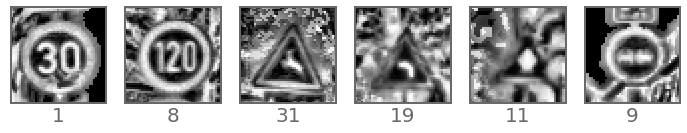

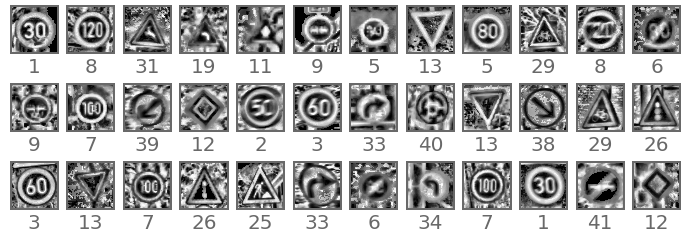

In [3]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test  : ", x_test.shape)
print("y_test  : ", y_test.shape)

if img_lz>1:
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly,img_lz), y_train, range(6),  columns=3,  x_size=4, y_size=3)
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly,img_lz), y_train, range(36), columns=12, x_size=1, y_size=1)
else:
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly), y_train, range(6),  columns=6,  x_size=2, y_size=2)
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly), y_train, range(36), columns=12, x_size=1, y_size=1)

## 4/ Create model

In [106]:
batch_size  =  64
num_classes =  43
epochs      =  16

In [107]:

def get_model_v1():
    model = keras.models.Sequential()
    model.add( keras.layers.Conv2D(96, (3,3), activation='relu', input_shape=(img_lx, img_ly, img_lz)))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Conv2D(192, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Flatten()) 
#     model.add( keras.layers.Dense(3072, activation='relu'))
    model.add( keras.layers.Dense(500, activation='relu'))
    model.add( keras.layers.Dense(500, activation='relu'))
    model.add( keras.layers.Dense(43, activation='softmax'))
    return model
    
def get_model_v2():
    model = keras.models.Sequential()

    model.add( keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(img_lx, img_ly, img_lz), activation='relu'))
    model.add( keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add( keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
    model.add( keras.layers.Conv2D(256, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Flatten())
    model.add( keras.layers.Dense(512, activation='relu'))
    model.add( keras.layers.Dropout(0.5))
    model.add( keras.layers.Dense(43, activation='softmax'))
    return model

def get_model_v3():
    model = keras.models.Sequential()
    model.add( keras.layers.Conv2D(32, (3,3),   activation='relu', input_shape=(img_lx, img_ly, img_lz)))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.5))

    model.add( keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.5))

    model.add( keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.5))

    model.add( keras.layers.Conv2D(256, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.5))

    model.add( keras.layers.Flatten()) 
    model.add( keras.layers.Dense(1152, activation='relu'))
    model.add( keras.layers.Dropout(0.5))

    model.add( keras.layers.Dense(43, activation='softmax'))
    return model


In [111]:
tf.keras.backend.clear_session()

model = get_model_v3()

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

## 5/ Run model

In [112]:
%%time

history = model.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 39209 samples, validate on 12630 samples
Epoch 1/16
39209/39209 [==============================] - 3s 81us/sample - loss: 2.4208 - accuracy: 0.3102 - val_loss: 0.7642 - val_accuracy: 0.7483
Epoch 2/16
39209/39209 [==============================] - 3s 66us/sample - loss: 0.7524 - accuracy: 0.7564 - val_loss: 0.3062 - val_accuracy: 0.9110
Epoch 3/16
39209/39209 [==============================] - 3s 66us/sample - loss: 0.4660 - accuracy: 0.8507 - val_loss: 0.2012 - val_accuracy: 0.9437
Epoch 4/16
39209/39209 [==============================] - 3s 66us/sample - loss: 0.3529 - accuracy: 0.8866 - val_loss: 0.1578 - val_accuracy: 0.9536
Epoch 5/16
39209/39209 [==============================] - 3s 65us/sample - loss: 0.2962 - accuracy: 0.9050 - val_loss: 0.1439 - val_accuracy: 0.9614
Epoch 6/16
39209/39209 [==============================] - 3s 67us/sample - loss: 0.2676 - accuracy: 0.9170 - val_loss: 0.1240 - val_accuracy: 0.9660
Epoch 7/16
39209/39209 [==============================] 

## 6/ Evaluation

In [110]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.1051
Test accuracy  : 0.9770


---
### Results :  
```
set-24x24-L        : size=230 Mo, 90.67%  
set-24x24-L-LHE    : size=230 Mo, 93.90%  
set-24x24-RGB      : size=784 Mo, 92.82%  
set-24x24-RGB-HE   : size=784 Mo, 92.64%  
set-48x48-L-LHE    : size=230 Mo, 97.70%  (v2)  1'52"  
set-48x48-RGB-HE   : size=xxx Mo, 96.94%  (v2)  
set-48x48-L-LHE    : size=784 Mo, 97.67%  (v3)  42"  
...
```